<a href="https://colab.research.google.com/github/Harshitalekya/EDA/blob/main/EDADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/drug200.csv')
df.head(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [ ]:
# Get dimensions of the dataset (rows, columns)
print(df.shape)

(200, 6)


In [ ]:
# Get basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  199 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         199 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [ ]:
# Get summary statistics for numerical columns
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
# Check for missing values
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    1
Na_to_K        0
Drug           1
dtype: int64


In [ ]:
# Fill missing values only for numerical columns
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)

In [ ]:
# Fill missing values for categorical columns with the mode (most frequent value)
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [ ]:
# Check all column names
print(df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [ ]:
df['Age'] = df['Age'].astype('float')  # Example for converting a column to float

In [ ]:
# Strip any leading/trailing spaces from the column names
df.columns = df.columns.str.strip()

In [ ]:
# Rename columns (example)
df.rename(columns={'OldColumnName': 'NewColumnName'}, inplace=True)

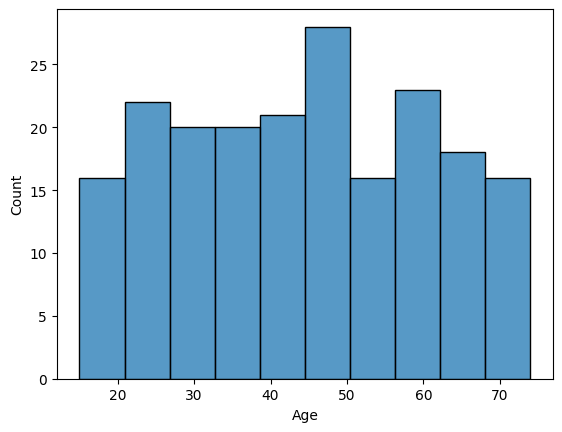

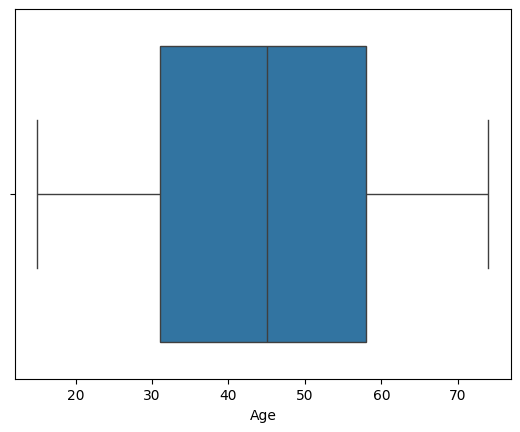

In [ ]:
#Univariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of a column
sns.histplot(df['Age'], bins=10)
plt.show()

# Box plot of a column
sns.boxplot(x=df['Age'])
plt.show()

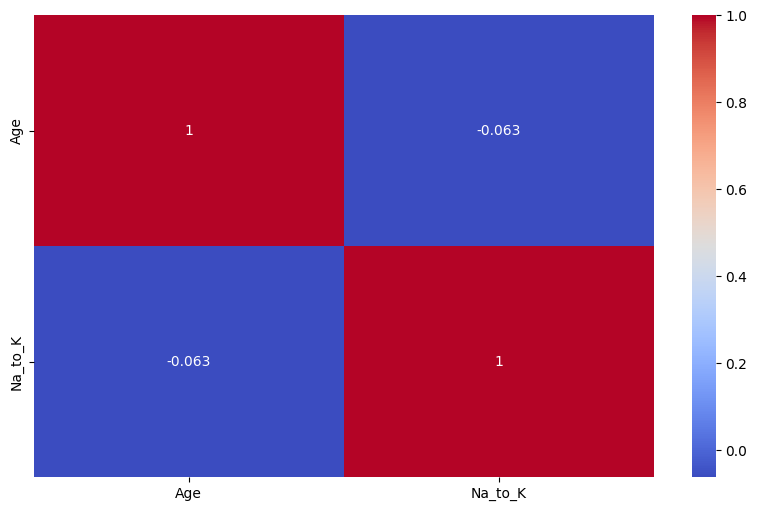

In [ ]:
#Bivariate Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap for numerical columns only
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()

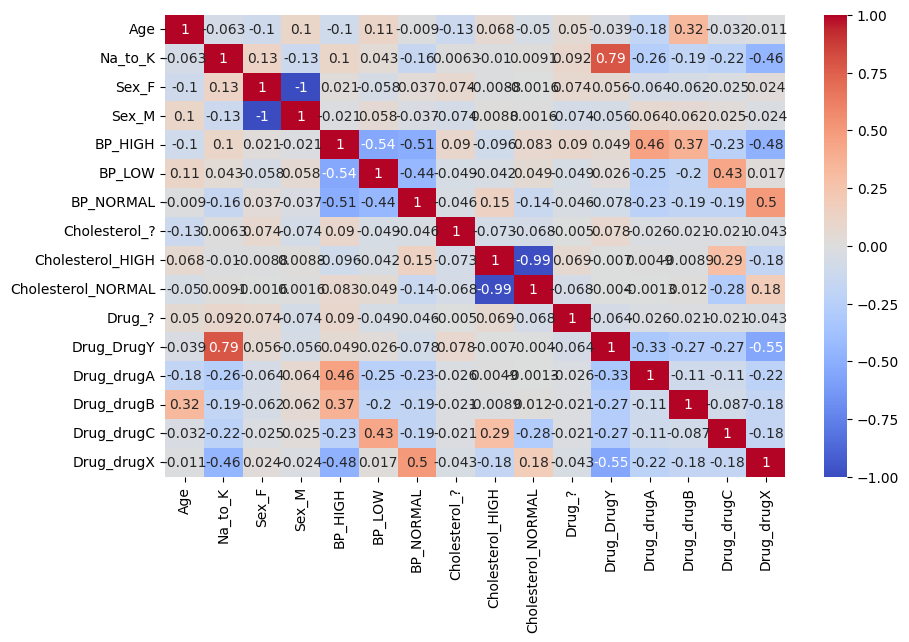

In [ ]:
# Convert categorical variables into dummy/indicator variables
df_encoded = pd.get_dummies(df)

# Now create a heatmap with the encoded DataFrame
plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.show()

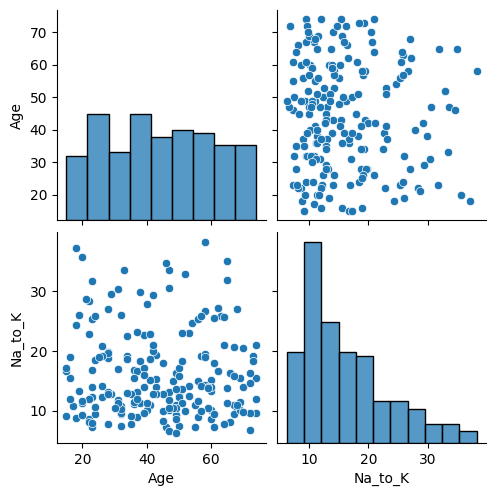

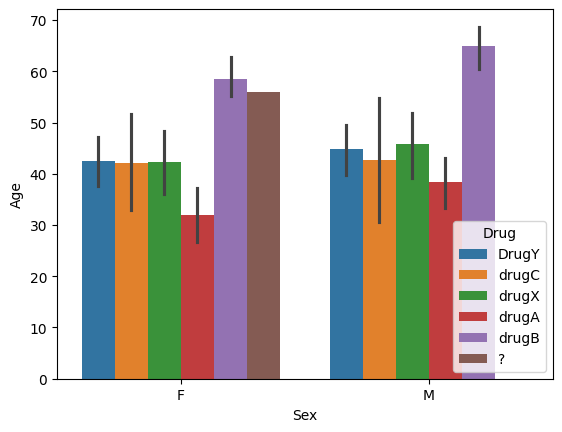

In [ ]:
#Multivariate Analysis
# Pair plot
sns.pairplot(df)
plt.show()

# Grouped bar plot
sns.barplot(x='Sex', y='Age', hue='Drug', data=df)
plt.show()

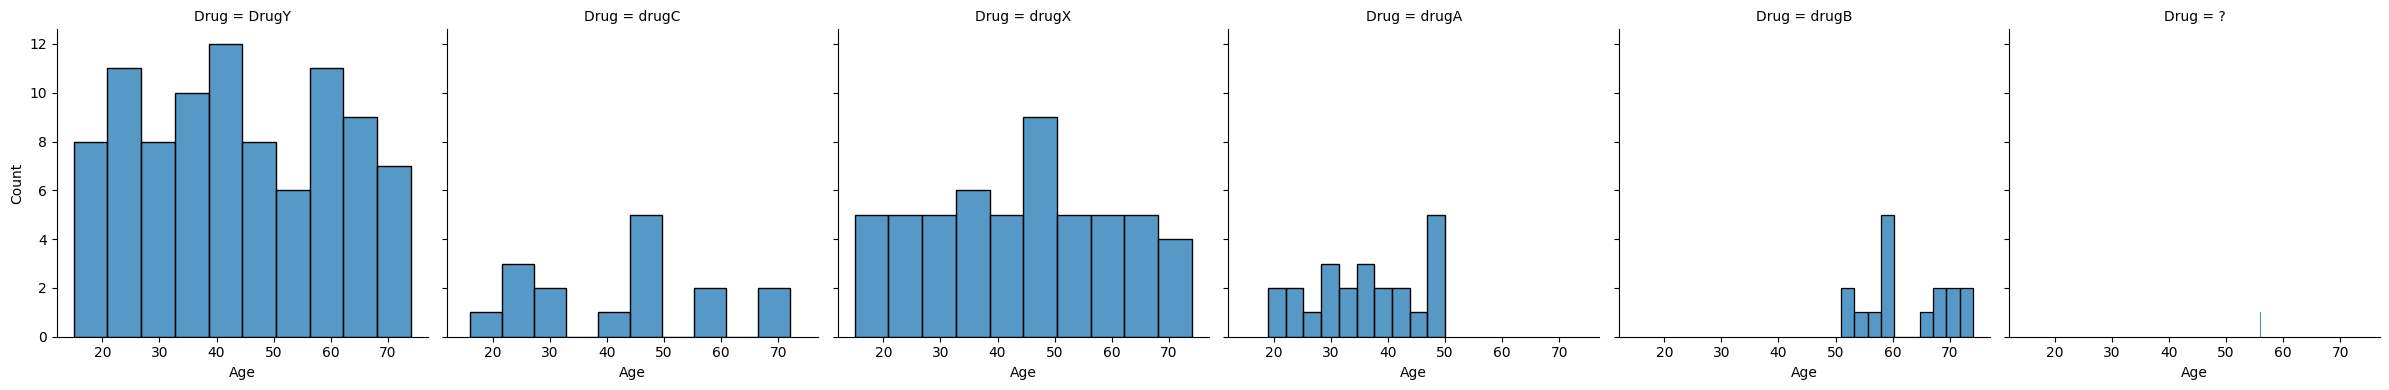

In [ ]:
#facetgrid
g = sns.FacetGrid(df, col='Drug', height=4, aspect=1)
g.map(sns.histplot, 'Age', bins=10)

plt.show()

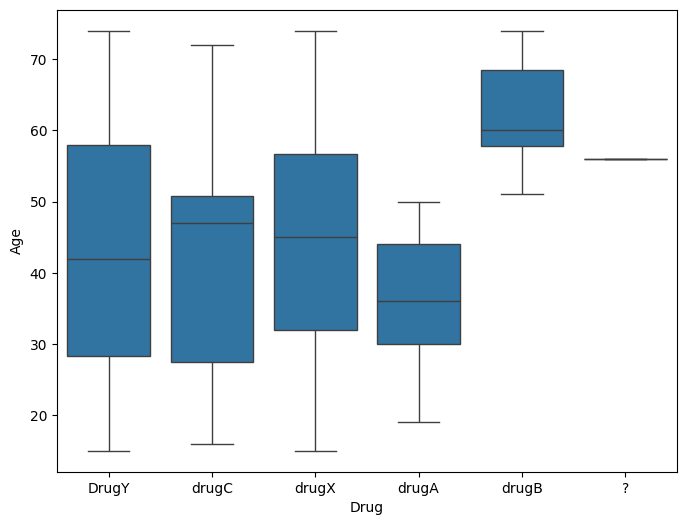

In [ ]:
#box plot
plt.figure(figsize=(8,6))
sns.boxplot(x='Drug', y='Age', data=df)

# Show the plot
plt.show()

In [ ]:
# Check the column names of the DataFrame
print(df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [ ]:
# Strip any leading or trailing spaces from column names
df.columns = df.columns.str.strip()

# Check column names again
print(df.columns)

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


In [ ]:
from scipy import stats

corr = stats.pearsonr(df["Na_to_K"],df["Age"])
print("p-value:\t", corr[1])
print("cor:\t\t", corr[0])

p-value:	 0.37457563990343007
cor:		 -0.06311949726772591


In [ ]:
# To find the correlation among the entire numerical records
# the columns using pearson method
correlation = df.corr(method='pearson', numeric_only=True)
correlation

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


<Axes: >

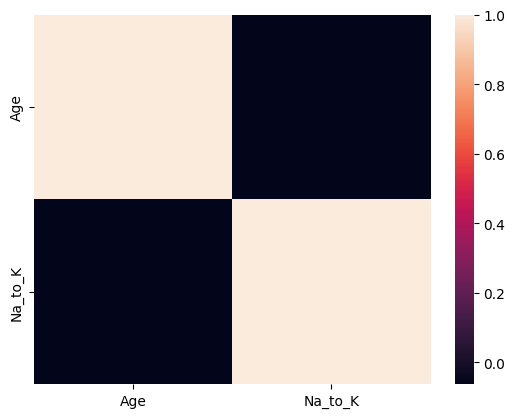

In [ ]:
#5. Visualize this correlation analysis using a heatmap.
#A heatmap is the best technique to make this look beautiful and easier to interpret:
sns.heatmap(correlation,xticklabels=correlation.columns,
            yticklabels=correlation.columns)

In [ ]:
#2. Check few entries inside the dataframe.
print(df.tail(10))
#print(df.head())

     Age Sex      BP Cholesterol  Na_to_K   Drug
190   58   M    HIGH        HIGH   18.991  DrugY
191   23   M    HIGH        HIGH    8.011  drugA
192   72   M     LOW        HIGH   16.310  DrugY
193   72   M     LOW        HIGH    6.769  drugC
194   46   F    HIGH         NaN   34.686  DrugY
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX


In [ ]:
#4. Note that the Date column has a data type of object.
#This is not correct. So, the next step is to correct the Date column
#convert object to datetime format
df['Na_to_K'] = pd.to_datetime(df['Na_to_K'])
df.dtypes

,0
Age,int64
Sex,object
BP,object
Cholesterol,object
Na_to_K,datetime64[ns]
Drug,object


In [ ]:
#6. Let's next change the index of our dataframe to the Date column
df = df.set_index('Age')
df.tail(3)

,Sex,BP,Cholesterol,Na_to_K,Drug
Age,,,,,
52,M,NORMAL,HIGH,1970-01-01 00:00:00.000000009,drugX
23,M,NORMAL,NORMAL,1970-01-01 00:00:00.000000014,drugX
40,F,LOW,NORMAL,1970-01-01 00:00:00.000000011,drugX


In [ ]:
df.shape

(200, 5)

In [ ]:
df = np.mean(df["Na_to_K"])
df

Timestamp('1970-01-01 00:00:00.000000015')